In [1]:
import arrival
import numpy as np
from IPython.display import SVG
from PIL import Image

In [2]:
def display_pixel_image(grid, w=100):
    scale = int(w * 0.92) // grid.shape[1]
    iwh = grid.shape[1] * scale, grid.shape[0] * scale
    size = w, int(grid.shape[0] / grid.shape[1] * w)
    offset = (size[0] - iwh[0]) // 2
    with Image.fromarray(grid*255, mode='L') as im, im.resize(iwh, 0) as im2:
        with Image.new('L', size) as canvas:
            canvas.paste(im2, (offset, offset))
            display(canvas)
    
def display_n(n):
    g = arrival.encode_number(n)
    display_pixel_image(g)
    display(n)

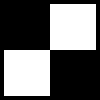

0

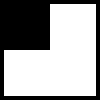

1

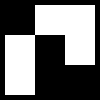

2

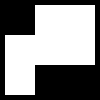

3

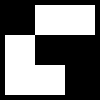

4

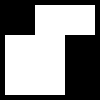

5

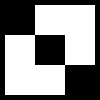

6

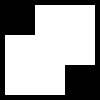

7

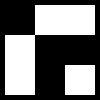

8

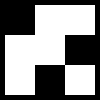

9

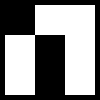

10

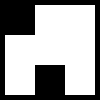

11

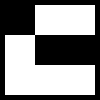

12

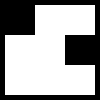

13

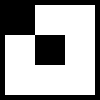

14

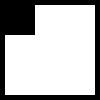

15

In [3]:
for i in range(16):
    display_n(i)

In [4]:
def ocr_arrival_image(fn):
    with Image.open(fn) as im:
        for symbol, box in arrival.ocr_image(im):
            yield (symbol, box, im.crop(box))
    
def decode_arrival_message(fn):
    res = list()
    run = None
    y = None
    for s, box, im in ocr_arrival_image(fn):
        if y != box[1]:
            y = box[1]
            if run: res.append(run)
            run = list()
        run.append(s)
    if run: res.append(run)
    return '\n'.join(' '.join(map(str, r)) for r in res)

def debug_ocr(fn, scale=4, pad=3):
    for symbol, box, crop in ocr_arrival_image(fn):
        crop = crop.resize((crop.size[0]*scale, crop.size[1]*scale), 0)
        wh = crop.size[0] + 2*pad, crop.size[1] + 2*pad
        px = np.zeros((*wh[::-1],3), dtype=np.uint8)
        with Image.fromarray(px, 'RGB') as im:
            im.paste(crop, (pad, pad))
            display(im)
        display(symbol)

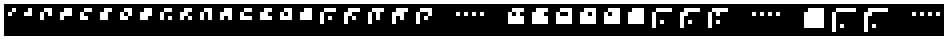

In [5]:
with Image.open('data/message2.png') as im:
    display(im)

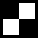

0

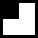

1

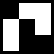

2

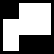

3

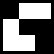

4

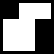

5

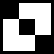

6

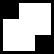

7

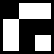

8

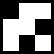

9

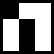

10

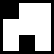

11

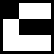

12

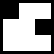

13

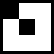

14

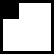

15

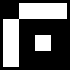

16

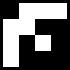

17

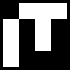

18

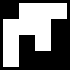

19

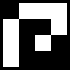

20

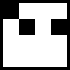

506

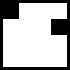

507

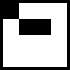

508

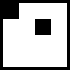

509

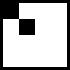

510

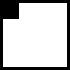

511

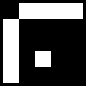

512

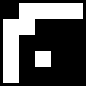

513

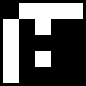

514

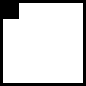

65535

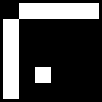

65536

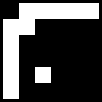

65537

In [6]:
debug_ocr('data/message2.png')

In [7]:
rs = decode_arrival_message('data/message2.png')
print(rs)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 506 507 508 509 510 511 512 513 514 65535 65536 65537


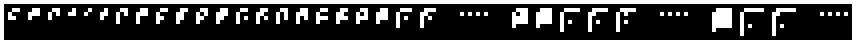

In [8]:
with Image.open('data/message3.png') as im:
    display(im)

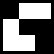

4

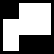

3

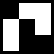

2

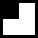

1

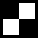

0

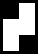

-1

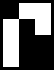

-2

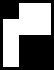

-3

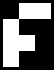

-4

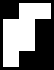

-5

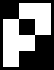

-6

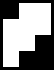

-7

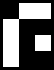

-8

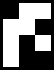

-9

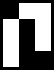

-10

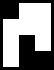

-11

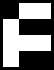

-12

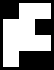

-13

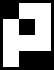

-14

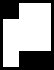

-15

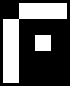

-16

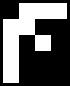

-17

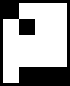

-510

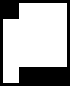

-511

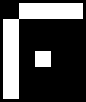

-512

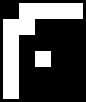

-513

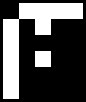

-514

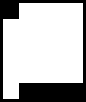

-65535

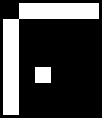

-65536

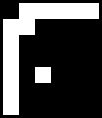

-65537

In [9]:
debug_ocr('data/message3.png')

In [10]:
rs = decode_arrival_message('data/message3.png')
print(rs)

4 3 2 1 0 -1 -2 -3 -4 -5 -6 -7 -8 -9 -10 -11 -12 -13 -14 -15 -16 -17 -510 -511 -512 -513 -514 -65535 -65536 -65537


In [11]:
def annotate_and_decode(fn, scale=10, pad=3):
    with Image.open(fn) as im:
        xim = arrival.annotate(im, scale=scale, pad=pad)
        display(SVG(data=xim))
    rs = decode_arrival_message(fn)
    print(rs)

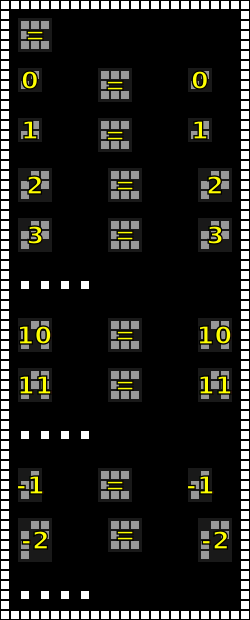

=
0 = 0
1 = 1
2 = 2
3 = 3
10 = 10
11 = 11
-1 = -1
-2 = -2


In [12]:
annotate_and_decode('data/message4.png')

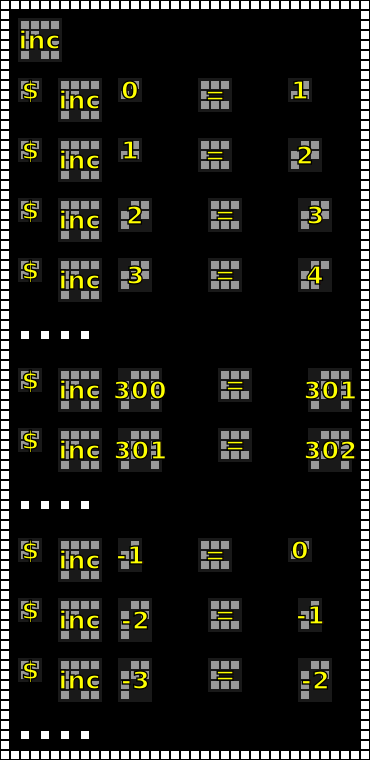

inc
$ inc 0 = 1
$ inc 1 = 2
$ inc 2 = 3
$ inc 3 = 4
$ inc 300 = 301
$ inc 301 = 302
$ inc -1 = 0
$ inc -2 = -1
$ inc -3 = -2


In [13]:
annotate_and_decode('data/message5.png')

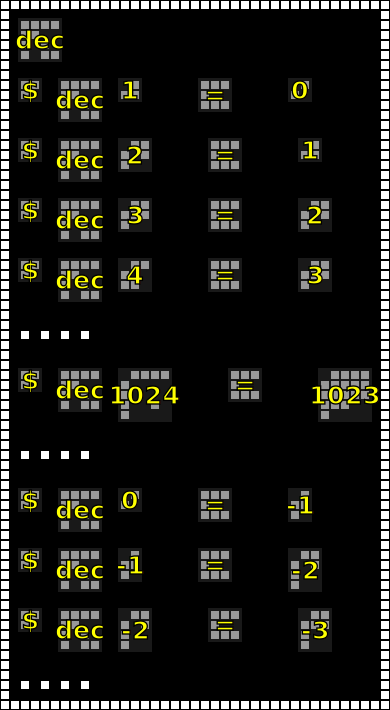

dec
$ dec 1 = 0
$ dec 2 = 1
$ dec 3 = 2
$ dec 4 = 3
$ dec 1024 = 1023
$ dec 0 = -1
$ dec -1 = -2
$ dec -2 = -3


In [14]:
annotate_and_decode('data/message6.png')

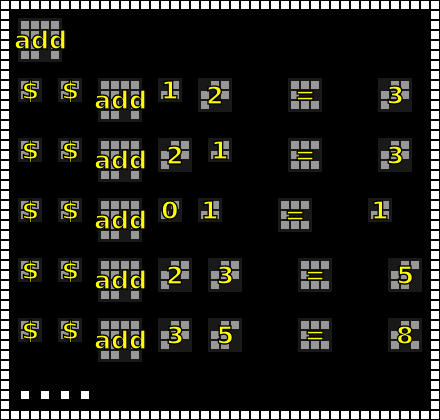

add
$ $ add 1 2 = 3
$ $ add 2 1 = 3
$ $ add 0 1 = 1
$ $ add 2 3 = 5
$ $ add 3 5 = 8


In [15]:
annotate_and_decode('data/message7.png')

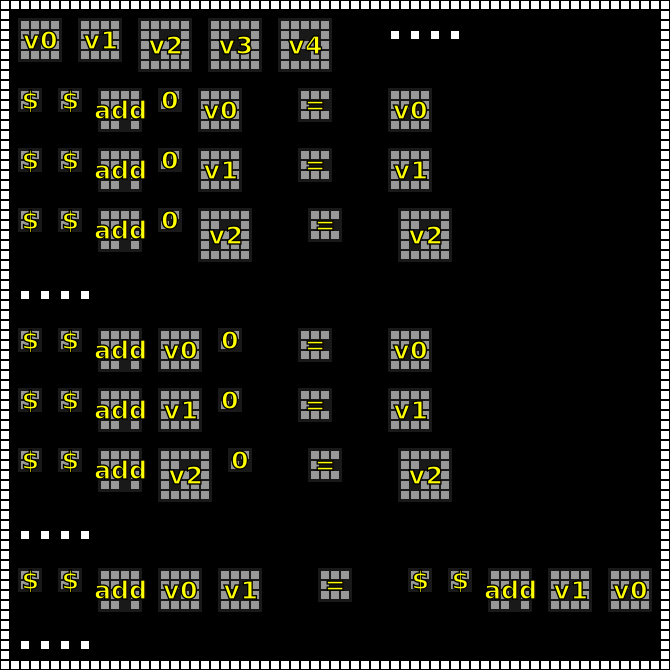

v0 v1 v2 v3 v4
$ $ add 0 v0 = v0
$ $ add 0 v1 = v1
$ $ add 0 v2 = v2
$ $ add v0 0 = v0
$ $ add v1 0 = v1
$ $ add v2 0 = v2
$ $ add v0 v1 = $ $ add v1 v0


In [16]:
annotate_and_decode('data/message8.png')

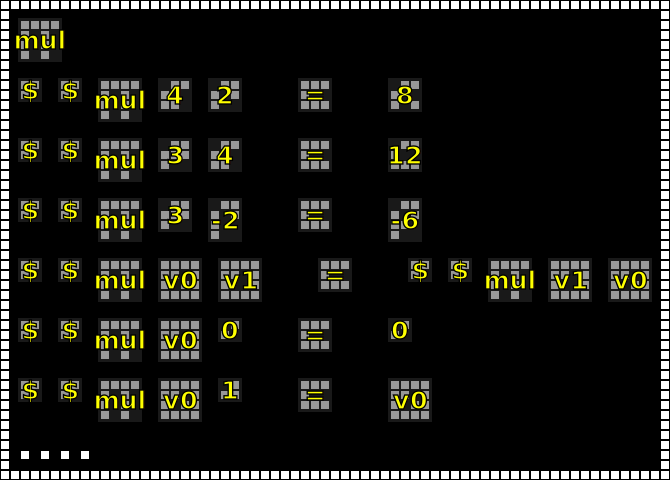

mul
$ $ mul 4 2 = 8
$ $ mul 3 4 = 12
$ $ mul 3 -2 = -6
$ $ mul v0 v1 = $ $ mul v1 v0
$ $ mul v0 0 = 0
$ $ mul v0 1 = v0


In [17]:
annotate_and_decode('data/message9.png')

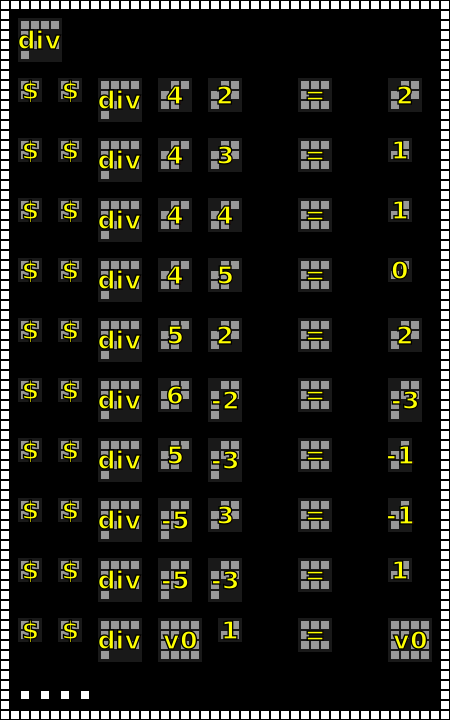

div
$ $ div 4 2 = 2
$ $ div 4 3 = 1
$ $ div 4 4 = 1
$ $ div 4 5 = 0
$ $ div 5 2 = 2
$ $ div 6 -2 = -3
$ $ div 5 -3 = -1
$ $ div -5 3 = -1
$ $ div -5 -3 = 1
$ $ div v0 1 = v0


In [18]:
annotate_and_decode('data/message10.png')

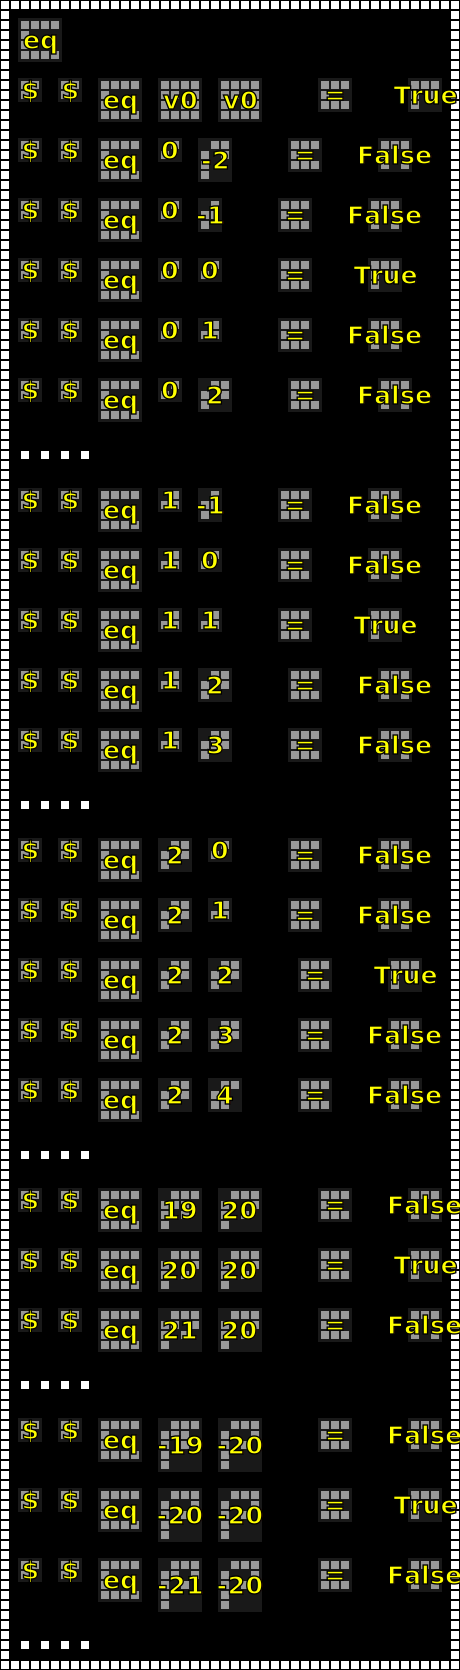

eq
$ $ eq v0 v0 = True
$ $ eq 0 -2 = False
$ $ eq 0 -1 = False
$ $ eq 0 0 = True
$ $ eq 0 1 = False
$ $ eq 0 2 = False
$ $ eq 1 -1 = False
$ $ eq 1 0 = False
$ $ eq 1 1 = True
$ $ eq 1 2 = False
$ $ eq 1 3 = False
$ $ eq 2 0 = False
$ $ eq 2 1 = False
$ $ eq 2 2 = True
$ $ eq 2 3 = False
$ $ eq 2 4 = False
$ $ eq 19 20 = False
$ $ eq 20 20 = True
$ $ eq 21 20 = False
$ $ eq -19 -20 = False
$ $ eq -20 -20 = True
$ $ eq -21 -20 = False


In [19]:
annotate_and_decode('data/message11.png')

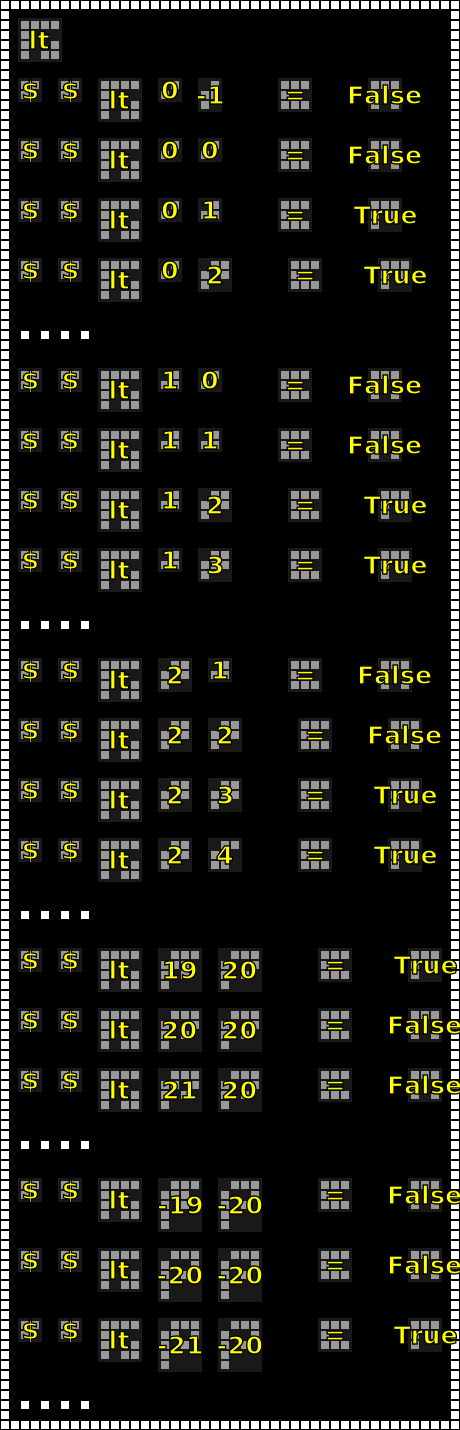

lt
$ $ lt 0 -1 = False
$ $ lt 0 0 = False
$ $ lt 0 1 = True
$ $ lt 0 2 = True
$ $ lt 1 0 = False
$ $ lt 1 1 = False
$ $ lt 1 2 = True
$ $ lt 1 3 = True
$ $ lt 2 1 = False
$ $ lt 2 2 = False
$ $ lt 2 3 = True
$ $ lt 2 4 = True
$ $ lt 19 20 = True
$ $ lt 20 20 = False
$ $ lt 21 20 = False
$ $ lt -19 -20 = False
$ $ lt -20 -20 = False
$ $ lt -21 -20 = True


In [20]:
annotate_and_decode('data/message12.png')

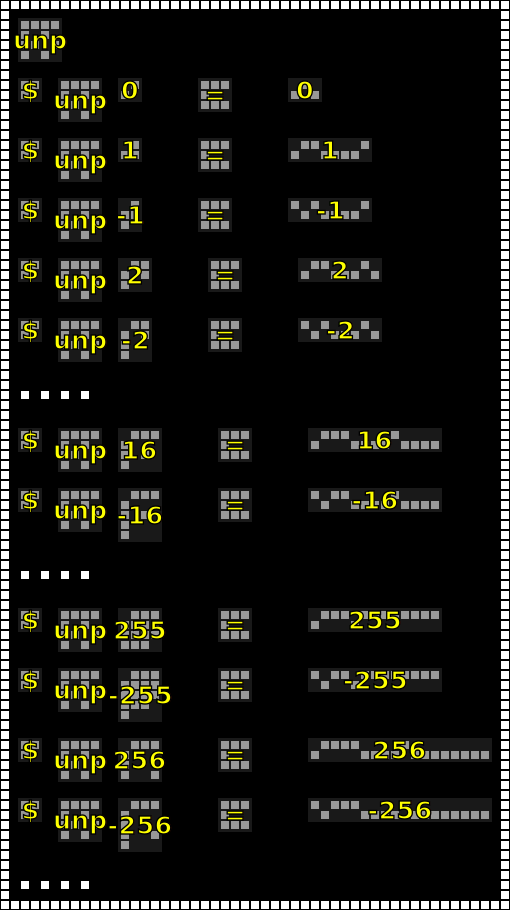

unp
$ unp 0 = 0
$ unp 1 = 1
$ unp -1 = -1
$ unp 2 = 2
$ unp -2 = -2
$ unp 16 = 16
$ unp -16 = -16
$ unp 255 = 255
$ unp -255 = -255
$ unp 256 = 256
$ unp -256 = -256


In [21]:
annotate_and_decode('data/message13.png')

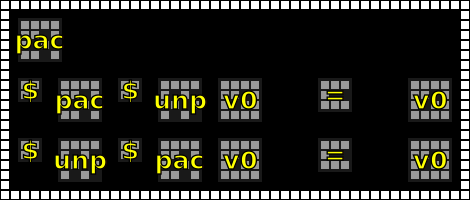

pac
$ pac $ unp v0 = v0
$ unp $ pac v0 = v0


In [22]:
annotate_and_decode('data/message14.png')

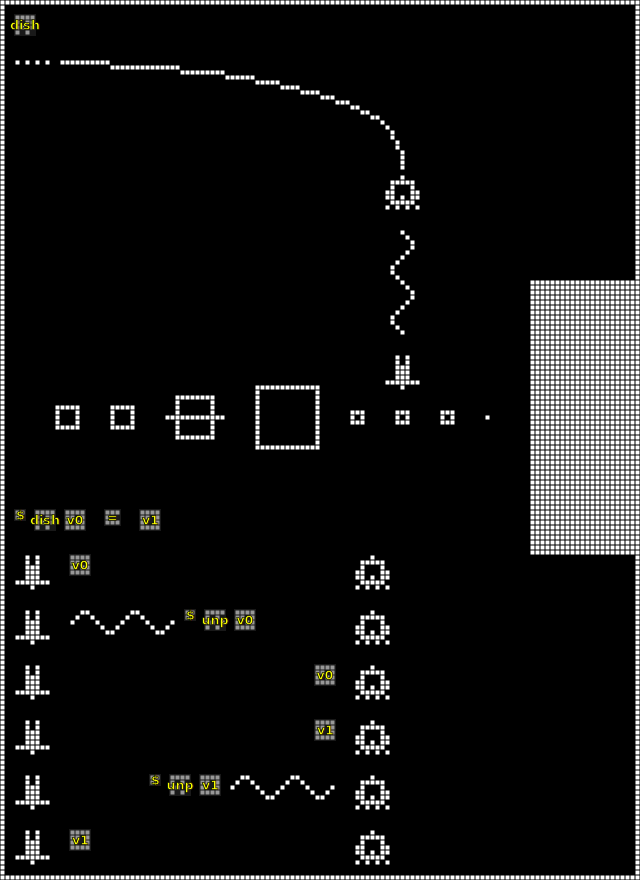

dish
$ dish v0 = v1
v0
$ unp v0
v0
v1
$ unp v1
v1


In [23]:
annotate_and_decode('data/message15.png', scale=5)

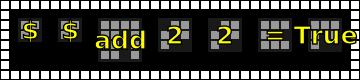

$ $ add 2 2 = True


In [26]:
annotate_and_decode('/Users/paiv/Downloads/download.png')